# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
<a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 

## Tutorial 5: Multi Assets Algorithmic Trading Backtesting with Backtrader

For this tutorial we need matplotlib=3.2.2 because backtrader only works with this version of matplotlib. However, this version of matplotlib give us an error in plot_pie function.

## 1. Downloading the data:

In [1]:
import pandas as pd
import datetime
import yfinance as yf
import backtrader as bt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Date range
start = '2010-01-01'
end = '2020-12-31'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA','SPY']
assets.sort()

# Downloading data
prices = yf.download(assets, start=start, end=end)
display(prices.head())
prices = prices.dropna()

[*********************100%***********************]  26 of 26 completed


Adj Close                                                       \
                  APA         BA        BAX        BMY     CMCSA       CNP   
Date                                                                         
2010-01-04  88.158691  43.777546  25.378492  17.356012  6.769780  8.888045   
2010-01-05  89.199593  45.211334  25.204336  17.085142  6.678026  8.820710   
2010-01-06  90.598511  46.582783  25.291418  17.078375  6.630154  8.735015   
2010-01-07  89.224564  48.468563  25.700678  17.091913  6.769780  8.820710   
2010-01-08  88.758247  48.001015  25.761629  16.807497  6.749832  8.716649   

                                                        ...     Volume  \
                  CPB         DE        HPQ        JCI  ...       PCAR   
Date                                                    ...              
2010-01-04  23.553055  43.575466  17.548599  12.845307  ...  2631700.0   
2010-01-05  23.594784  43.412235  17.622204  12.781564  ...  2299300.0   
2010-01-06  23.330521  43.295647  17.458263  12.739059  ...  3565000.0   
2010-01-07  22.975876  43.606552  17.464958  12.831143  ...  2455700.0   
2010-01-08  22.829840  44.795830  17.595438  12.873639  ...  2404300.0   

                                                                       \
                  PSA        SEE          SPY           T         TGT   
Date                                                                    
2010-01-04  1579100.0   920400.0  118944600.0  29136600.0   4589100.0   
2010-01-05  1131000.0   831400.0  111579900.0  35234500.0   4760100.0   
2010-01-06   832400.0  1334400.0  116074400.0  37894600.0   7217400.0   
2010-01-07  1284100.0  1394900.0  131091100.0  33600300.0  12531000.0   
2010-01-08  1281100.0   702900.0  126402800.0  27633400.0   6512800.0   

                                                           
                  TMO         TXT          VZ        ZION  
Date                                                       
2010-01-04  7182800.0   3630600.0  16176648.0   3974600.0  
2010-01-05  3221900.0  12121100.0  23722957.0   5605500.0  
2010-01-06  3065000.0   5598300.0  37506464.0  12615200.0  
2010-01-07  2638300.0   5196100.0  25508242.0  24716800.0  
2010-01-08  3162200.0   4104000.0  20658308.0   6903000.0  

[5 rows x 156 columns]

In [2]:
############################################################
# Showing data
############################################################

display(prices.head())

Adj Close                                                       \
                  APA         BA        BAX        BMY     CMCSA       CNP   
Date                                                                         
2010-01-04  88.158691  43.777546  25.378492  17.356012  6.769780  8.888045   
2010-01-05  89.199593  45.211334  25.204336  17.085142  6.678026  8.820710   
2010-01-06  90.598511  46.582783  25.291418  17.078375  6.630154  8.735015   
2010-01-07  89.224564  48.468563  25.700678  17.091913  6.769780  8.820710   
2010-01-08  88.758247  48.001015  25.761629  16.807497  6.749832  8.716649   

                                                        ...     Volume  \
                  CPB         DE        HPQ        JCI  ...       PCAR   
Date                                                    ...              
2010-01-04  23.553055  43.575466  17.548599  12.845307  ...  2631700.0   
2010-01-05  23.594784  43.412235  17.622204  12.781564  ...  2299300.0   
2010-01-06  23.330521  43.295647  17.458263  12.739059  ...  3565000.0   
2010-01-07  22.975876  43.606552  17.464958  12.831143  ...  2455700.0   
2010-01-08  22.829840  44.795830  17.595438  12.873639  ...  2404300.0   

                                                                       \
                  PSA        SEE          SPY           T         TGT   
Date                                                                    
2010-01-04  1579100.0   920400.0  118944600.0  29136600.0   4589100.0   
2010-01-05  1131000.0   831400.0  111579900.0  35234500.0   4760100.0   
2010-01-06   832400.0  1334400.0  116074400.0  37894600.0   7217400.0   
2010-01-07  1284100.0  1394900.0  131091100.0  33600300.0  12531000.0   
2010-01-08  1281100.0   702900.0  126402800.0  27633400.0   6512800.0   

                                                           
                  TMO         TXT          VZ        ZION  
Date                                                       
2010-01-04  7182800.0   3630600.0  16176648.0   3974600.0  
2010-01-05  3221900.0  12121100.0  23722957.0   5605500.0  
2010-01-06  3065000.0   5598300.0  37506464.0  12615200.0  
2010-01-07  2638300.0   5196100.0  25508242.0  24716800.0  
2010-01-08  3162200.0   4104000.0  20658308.0   6903000.0  

[5 rows x 156 columns]

## 2. Building the Backtest Function with Backtrader

### 2.1 Defining Backtest Function

In [3]:
############################################################
# Defining the backtest function 
############################################################

def backtest(datas, strategy, start, end, plot=False, **kwargs):
    cerebro = bt.Cerebro()

    # Here we add transaction costs and other broker costs
    cerebro.broker.setcash(1000000.0)
    cerebro.broker.setcommission(commission=0.005) # Commission 0.5%
    cerebro.broker.set_slippage_perc(0.005, # Slippage 0.5%
                                     slip_open=True,
                                     slip_limit=True,
                                     slip_match=True,
                                     slip_out=False)
    for data in datas:
        cerebro.adddata(data)

    # Here we add the indicators that we are going to store
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=0.0)
    cerebro.addanalyzer(bt.analyzers.Returns)
    cerebro.addanalyzer(bt.analyzers.DrawDown)
    cerebro.addstrategy(strategy, **kwargs)
    cerebro.addobserver(bt.observers.Value)
    cerebro.addobserver(bt.observers.DrawDown)
    results = cerebro.run(stdstats=False)
    if plot:
        cerebro.plot(iplot=False, start=start, end=end)
    return (results[0].analyzers.drawdown.get_analysis()['max']['drawdown'],
            results[0].analyzers.returns.get_analysis()['rnorm100'],
            results[0].analyzers.sharperatio.get_analysis()['sharperatio'])

### 2.2 Building Data Feeds for Backtesting

In [4]:
############################################################
# Create objects that contain the prices of assets
############################################################

# Creating Assets bt.feeds
assets_prices = []
for i in assets:
    if i != 'SPY':
        prices_ = prices.drop(columns='Adj Close').loc[:, (slice(None), i)].dropna()
        prices_.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
        assets_prices.append(bt.feeds.PandasData(dataname=prices_, plot=False))

# Creating Benchmark bt.feeds        
prices_ = prices.drop(columns='Adj Close').loc[:, (slice(None), 'SPY')].dropna()
prices_.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
benchmark = bt.feeds.PandasData(dataname=prices_, plot=False)

display(prices_.head())

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,113.330002,113.389999,111.510002,112.370003,118944600.0
2010-01-05,113.629997,113.680000,112.849998,113.260002,111579900.0
2010-01-06,113.709999,113.989998,113.430000,113.519997,116074400.0
2010-01-07,114.190002,114.330002,113.180000,113.500000,131091100.0
2010-01-08,114.570000,114.620003,113.660004,113.889999,126402800.0


## 3. Building Strategies with Backtrader

### 3.1 Buy and Hold SPY

In [5]:
############################################################
# Building the Buy and Hold strategy
############################################################

class BuyAndHold(bt.Strategy):

    def __init__(self):
        self.counter = 0

    def next(self):
        if self.counter >= 1004:
            if self.getposition(self.data).size == 0:
                self.order_target_percent(self.data, target=0.99)
        self.counter += 1 

If you have an error related to 'warnings' modules when you try to plot, you must modify the 'locator.py' file from backtrader library following the instructions in this __[link](https://community.backtrader.com/topic/981/importerror-cannot-import-name-min_per_hour-when-trying-to-plot/8)__.

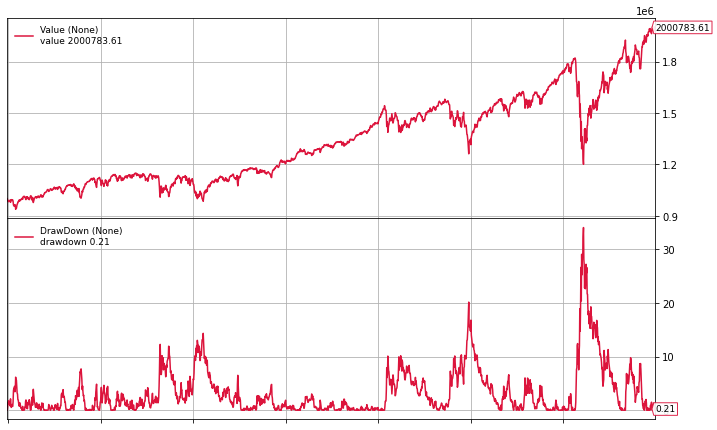

In [6]:
############################################################
# Run the backtest for the selected period
############################################################
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6) # (w, h)
plt.plot() # We need to do this to avoid errors in inline plot

start = 1004
end = prices.shape[0] - 1

dd, cagr, sharpe = backtest([benchmark],
                            BuyAndHold,
                            start=start,
                            end=end,
                            plot=True)

In [7]:
############################################################
# Show Buy and Hold Strategy Stats 
############################################################

print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

Max Drawdown: 34.10%
CAGR: 6.53%
Sharpe: 0.679


### 3.2 Rebalancing Quarterly using Riskfolio-Lib

In [8]:
############################################################
# Calculate assets returns
############################################################

pd.options.display.float_format = '{:.4%}'.format

data = prices.loc[:, ('Adj Close', slice(None))]
data.columns = assets
data = data.drop(columns=['SPY']).dropna()
returns = data.pct_change().dropna()
display(returns.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,1.1807%,3.2752%,-0.6862%,-1.5607%,-1.3553%,-0.7576%,0.1772%,-0.3746%,0.4194%,-0.4962%,...,-0.2579%,1.8028%,0.8237%,-1.0445%,-0.4899%,0.3707%,0.3368%,-1.8908%,0.1803%,3.5259%
2010-01-06,1.5683%,3.0334%,0.3455%,-0.0396%,-0.7169%,-0.9715%,-1.1200%,-0.2686%,-0.9303%,-0.3325%,...,-1.1635%,1.3147%,-0.6065%,-1.9275%,-1.4633%,1.9084%,0.9442%,3.4797%,-2.8754%,8.6956%
2010-01-07,-1.5165%,4.0482%,1.6182%,0.0793%,2.1059%,0.9811%,-1.5201%,0.7181%,0.0383%,0.7228%,...,-1.2427%,1.3241%,-0.1370%,1.0295%,-1.1228%,1.2284%,0.0000%,4.4490%,-0.5952%,11.2000%
2010-01-08,-0.5226%,-0.9646%,0.2372%,-1.6640%,-0.2947%,-1.1797%,-0.6356%,2.7273%,0.7471%,0.3312%,...,-0.5298%,0.1307%,-1.8207%,0.4169%,-0.7326%,-0.3978%,1.6836%,0.9411%,0.0631%,-1.6187%
2010-01-11,0.3002%,-1.1851%,-0.5746%,1.0476%,-0.6501%,0.7022%,0.3046%,4.0257%,-0.3042%,2.5860%,...,1.2650%,1.6445%,0.6859%,-0.0461%,-0.4797%,0.2197%,1.1856%,5.3484%,0.4094%,0.6094%


In [9]:
############################################################
# Selecting Dates for Rebalancing
############################################################

# Selecting last day of month of available data
index = returns.groupby([returns.index.year, returns.index.month]).tail(1).index
index_2 = returns.index

# Quarterly Dates
index = [x for x in index if float(x.month) % 3.0 == 0 ] 

# Dates where the strategy will be backtested
index_ = [index_2.get_loc(x) for x in index if index_2.get_loc(x) > 1000]

In [10]:
############################################################
# Building Constraints
############################################################

asset_classes = {'Assets': ['JCI','TGT','CMCSA','CPB','MO','APA','MMC','JPM',
                            'ZION','PSA','BAX','BMY','LUV','PCAR','TXT','TMO',
                            'DE','MSFT','HPQ','SEE','VZ','CNP','NI','T','BA'], 
                 'Industry': ['Consumer Discretionary','Consumer Discretionary',
                              'Consumer Discretionary', 'Consumer Staples',
                              'Consumer Staples','Energy','Financials',
                              'Financials','Financials','Financials',
                              'Health Care','Health Care','Industrials','Industrials',
                              'Industrials','Health care','Industrials',
                              'Information Technology','Information Technology',
                              'Materials','Telecommunications Services','Utilities',
                              'Utilities','Telecommunications Services','Financials']}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

constraints = {'Disabled': [False, False, False],
               'Type': ['All Assets', 'All Classes', 'All Classes'],
               'Set': ['', 'Industry', 'Industry'],
               'Position': ['', '', ''],
               'Sign': ['<=', '<=', '>='],
               'Weight': [0.10, 0.20, 0.03],
               'Type Relative': ['', '', ''],
               'Relative Set': ['', '', ''],
               'Relative': ['', '', ''],
               'Factor': ['', '', '']}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,All Assets,,,<=,10.0000%,,,,
1,False,All Classes,Industry,,<=,20.0000%,,,,
2,False,All Classes,Industry,,>=,3.0000%,,,,


In [11]:
############################################################
# Building constraint matrixes for Riskfolio Lib
############################################################

import riskfolio as rp

A, B = rp.assets_constraints(constraints, asset_classes)

In [12]:
%%time
############################################################
# Building a loop that estimate optimal portfolios on
# rebalancing dates
############################################################

models = {}

# rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM',
#        'CVaR', 'WR', 'MDD', 'ADD', 'CDaR']

rms = ['MV', 'CVaR', 'WR', 'CDaR']

for j in rms:
    
    weights = pd.DataFrame([])

    for i in index_:
        Y = returns.iloc[i-1000:i,:] # taking last 4 years (250 trading days per year)

        # Building the portfolio object
        port = rp.Portfolio(returns=Y)
        
        # Add portfolio constraints
        port.ainequality = A
        port.binequality = B
        
        # Calculating optimum portfolio

        # Select method and estimate input parameters:

        method_mu='hist' # Method to estimate expected returns based on historical data.
        method_cov='hist' # Method to estimate covariance matrix based on historical data.

        port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)
        
        # Estimate optimal portfolio:
        
        port.solvers = ['MOSEK']
        port.alpha = 0.05
        model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
        rm = j # Risk measure used, this time will be variance
        obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
        hist = True # Use historical scenarios for risk measures that depend on scenarios
        rf = 0 # Risk free rate
        l = 0 # Risk aversion factor, only useful when obj is 'Utility'

        w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

        if w is None:
            w = weights.tail(1).T
        weights = pd.concat([weights, w.T], axis = 0)
    
    models[j] = weights.copy()
    models[j].index = index_

CPU times: user 7min 32s, sys: 25 s, total: 7min 58s
Wall time: 8min 28s


In [13]:
############################################################
# Building the Asset Allocation Class
############################################################

class AssetAllocation(bt.Strategy):

    def __init__(self):

        j = 0
        for i in assets:
            setattr(self, i, self.datas[j])
            j += 1
        
        self.counter = 0
        
    def next(self):
        if self.counter in weights.index.tolist():
            for i in assets:
                w = weights.loc[self.counter, i]
                self.order_target_percent(getattr(self, i), target=w)
        self.counter += 1

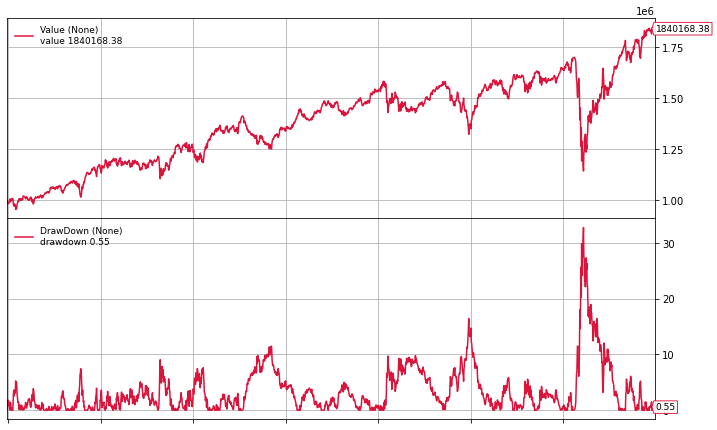

In [14]:
############################################################
# Backtesting Mean Variance Strategy
############################################################

assets = returns.columns.tolist()
weights = models['MV']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)

In [15]:
############################################################
# Show Mean Variance Strategy Stats 
############################################################

print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

Max Drawdown: 32.80%
CAGR: 5.68%
Sharpe: 0.701


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff13505e220>],
      dtype=object)

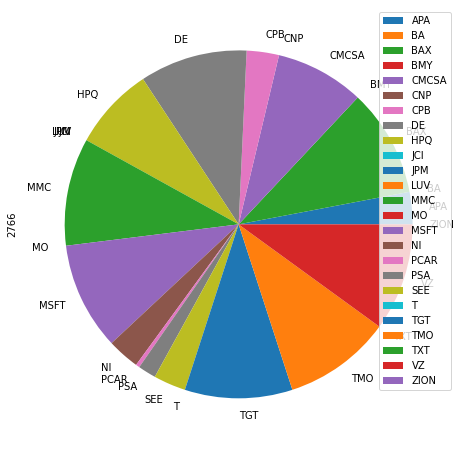

In [16]:
############################################################
# Plotting the composition of the last MV portfolio
############################################################

w = pd.DataFrame(models['MV'].iloc[-1,:])

# We need matplotlib >= 3.3.0 to use this function
#ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
#                 height=6, width=10, ax=None)

w.plot.pie(subplots=True, figsize=(8, 8))

In [17]:
############################################################
# Composition per Industry
############################################################

w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)
w_classes = w_classes.groupby(['Industry']).sum()
w_classes.columns = ['weights']
display(w_classes)

,weights
Industry,
Consumer Discretionary,18.2680%
Consumer Staples,3.0000%
Energy,3.0000%
Financials,11.6790%
Health Care,10.0000%
Health care,10.0000%
Industrials,10.3567%
Information Technology,17.6964%
Materials,3.0000%


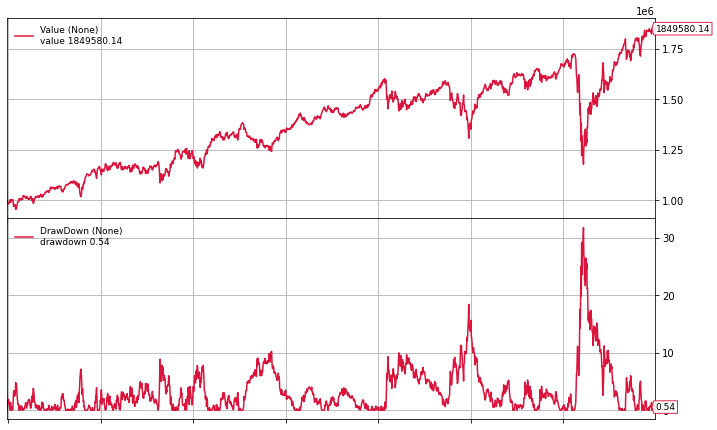

In [18]:
############################################################
# Backtesting Mean CVaR Strategy
############################################################

assets = returns.columns.tolist()
weights = models['CVaR']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)

In [19]:
############################################################
# Show CVaR Strategy Stats 
############################################################

print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

Max Drawdown: 31.77%
CAGR: 5.73%
Sharpe: 0.694


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff134d87340>],
      dtype=object)

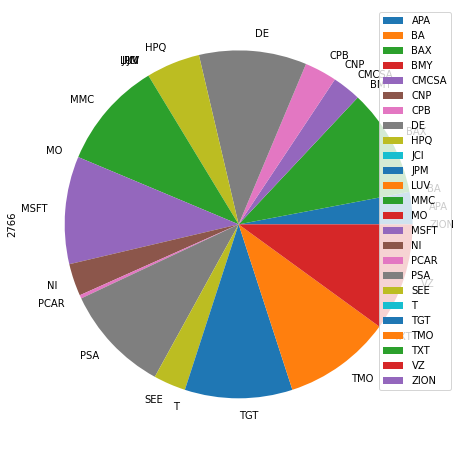

In [20]:
############################################################
# Plotting the composition of the last CVaR portfolio
############################################################

w = pd.DataFrame(models['CVaR'].iloc[-1,:])

# We need matplotlib >= 3.3.0 to use this function
#ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
#                 height=6, width=10, ax=None)

w.plot.pie(subplots=True, figsize=(8, 8))

In [21]:
############################################################
# Composition per Industry
############################################################

w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)
w_classes = w_classes.groupby(['Industry']).sum()
w_classes.columns = ['weights']
display(w_classes)

,weights
Industry,
Consumer Discretionary,12.6708%
Consumer Staples,3.0000%
Energy,3.0000%
Financials,20.0000%
Health Care,10.0000%
Health care,10.0000%
Industrials,10.3198%
Information Technology,15.0093%
Materials,3.0000%


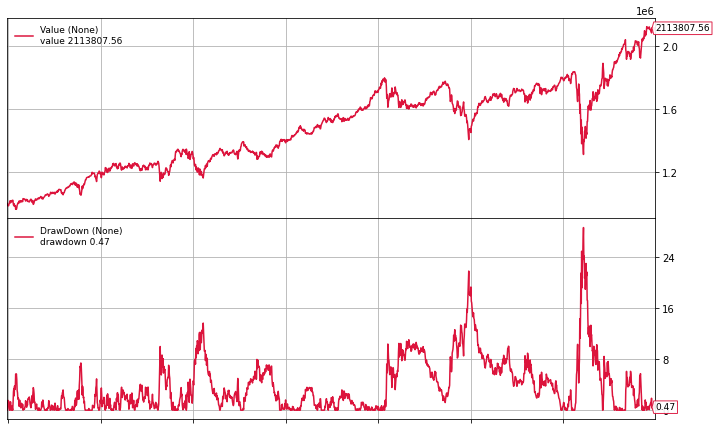

In [22]:
############################################################
# Backtesting Mean Worst Realization Strategy
############################################################

assets = returns.columns.tolist()
weights = models['WR']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)

In [23]:
############################################################
# Show Worst Realization Strategy Stats 
############################################################

print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

Max Drawdown: 28.66%
CAGR: 7.03%
Sharpe: 0.681


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1338e4bb0>],
      dtype=object)

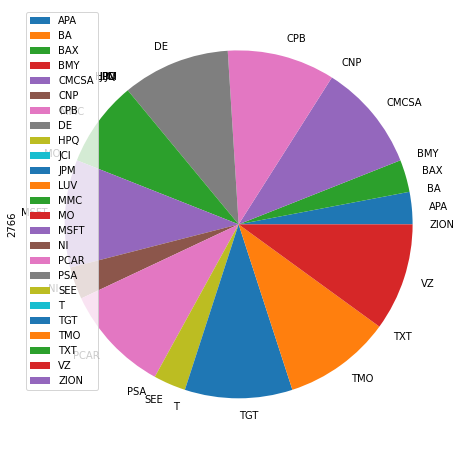

In [24]:
############################################################
# Plotting the composition of the last WR portfolio
############################################################

w = pd.DataFrame(models['WR'].iloc[-1,:])

# We need matplotlib >= 3.3.0 to use this function
#ax = rp.plot_pie(w=w, title='Sharpe Mean WR', others=0.05, nrow=25, cmap = "tab20",
#                 height=6, width=10, ax=None)

w.plot.pie(subplots=True, figsize=(8, 8))

In [25]:
############################################################
# Composition per Industry
############################################################

w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)
w_classes = w_classes.groupby(['Industry']).sum()
w_classes.columns = ['weights']
display(w_classes)

,weights
Industry,
Consumer Discretionary,20.0000%
Consumer Staples,10.0000%
Energy,3.0000%
Financials,8.0000%
Health Care,3.0000%
Health care,10.0000%
Industrials,20.0000%
Information Technology,10.0000%
Materials,3.0000%


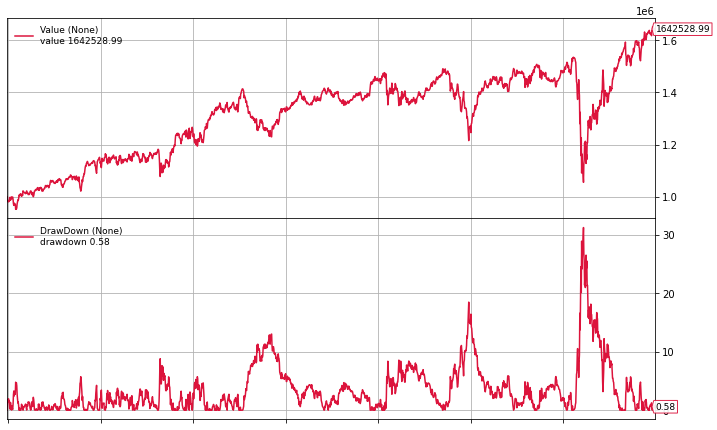

In [26]:
############################################################
# Backtesting Mean CDaR Strategy
############################################################

assets = returns.columns.tolist()
weights = models['CDaR']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)

In [27]:
############################################################
# Show CDaR Strategy Stats 
############################################################

print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

Max Drawdown: 31.24%
CAGR: 4.60%
Sharpe: 0.622


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff14a4a2ca0>],
      dtype=object)

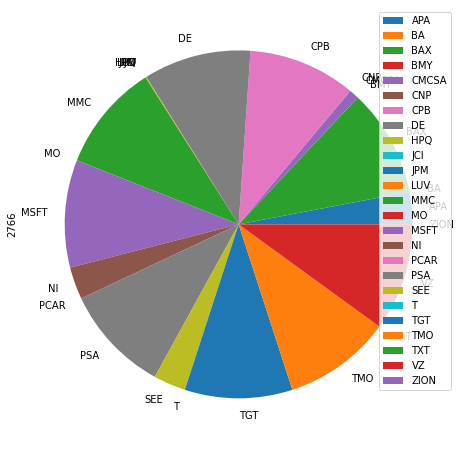

In [28]:
############################################################
# Plotting the composition of the last CDaR portfolio
############################################################

w = pd.DataFrame(models['CDaR'].iloc[-1,:])

# We need matplotlib >= 3.3.0 to use this function
#ax = rp.plot_pie(w=w, title='Sharpe Mean CDaR', others=0.05, nrow=25, cmap = "tab20",
#                 height=6, width=10, ax=None)

w.plot.pie(subplots=True, figsize=(8, 8))

In [29]:
############################################################
# Composition per Industry
############################################################

w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)
w_classes = w_classes.groupby(['Industry']).sum()
w_classes.columns = ['weights']
display(w_classes)

,weights
Industry,
Consumer Discretionary,10.9130%
Consumer Staples,10.0000%
Energy,3.0000%
Financials,20.0000%
Health Care,10.0000%
Health care,10.0000%
Industrials,10.0000%
Information Technology,10.0870%
Materials,3.0000%


## 4. Conclusion

In this example, the best strategy in terms of performance is __WR__ . The ranking of strategies in base of performance follows:

1. WR (7.03%): Worst Scenario or Minimax Model.
1. SPY (6.53%): Buy and Hold SPY.
1. CVaR (5.73%): Conditional Value at Risk.
1. MV (5.68%): Mean Variance.
1. CDaR (4.60%): Conditional Drawdown at Risk.

On the other hand, the best strategy in terms of Sharpe Ratio is __MV__ . The ranking of strategies in base of Sharpe Ratio follows:

1. MV (0.701): Mean Variance.
1. CVaR (0.694): Conditional Value at Risk.
1. WR (0.681): Worst Scenario or Minimax Model.
1. SPY (0.679): Buy and Hold SPY.
1. CDaR (0.622): Conditional Drawdown at Risk.